
![Food](https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png)
# Scénario

Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.
L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Mon objectif est de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets.

Après les premières présentations, effectuées dans une ambiance des plus conviviales, mon manager Patrick m'explique explique les enjeux de la mission :

- **1- Tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation**
- **2- Utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering + analyser les centroïdes des classes**
- **3- Réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...**

## Importation des librairies

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functionsACP import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.stats as st
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
import seaborn as sns

## Charger et voir les données 

## Analyse de la forme des données

### 1- Données sur la disponibilité alimentaire en 2017

In [108]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P9_darosa_kim\\DisponibiliteAlimentaire_2017.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_dispo_alim17=df_1.copy()
df_dispo_alim17

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée


In [4]:
df_dispo_alim17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176600 entries, FBS to FBS
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Domaine                 176600 non-null  object 
 1   Code zone               176600 non-null  int64  
 2   Zone                    176600 non-null  object 
 3   Code Élément            176600 non-null  int64  
 4   Élément                 176600 non-null  object 
 5   Code Produit            176600 non-null  int64  
 6   Produit                 176600 non-null  object 
 7   Code année              176600 non-null  int64  
 8   Année                   176600 non-null  int64  
 9   Unité                   176600 non-null  object 
 10  Valeur                  176600 non-null  float64
 11  Symbole                 176600 non-null  object 
 12  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 18.9+ MB


#### Compter les valeurs NaN 

In [5]:
(df_dispo_alim17.isnull().sum()/df_dispo_alim17.shape[0]).sort_values(ascending=True)* 100

Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

Il n'y a aucune valeur manquante.

Comptons les Valeurs de chaque colonnes

In [8]:
clns = df_dispo_alim17.columns
for cln in clns:
 print(f"{cln} : {df_dispo_alim17[cln].value_counts()}\n")

Domaine : Nouveaux Bilans Alimentaire    176600
Name: Domaine, dtype: int64

Code zone : 39     1416
215    1229
114    1217
202    1194
226    1175
       ... 
2       755
120     383
235     379
26       68
17       56
Name: Code zone, Length: 174, dtype: int64

Zone : Tchad                                    1416
République-Unie de Tanzanie              1229
Kenya                                    1217
Afrique du Sud                           1194
Ouganda                                  1175
                                         ... 
Afghanistan                               755
République démocratique populaire lao     383
Ouzbékistan                               379
Brunéi Darussalam                          68
Bermudes                                   56
Name: Zone, Length: 174, dtype: int64

Code Élément : 5301    15905
5611    15260
645     14618
684     14512
674     14507
5142    14498
664     14476
5170    12567
5911    12113
5072    11299
5511    10334
5123     5813


Indexons la colone Zone

In [109]:
df_dispo_alim17.index = df_dispo_alim17.Zone

On peut supprimer les colonnes non essentielles

In [100]:
df_dispo_alim17.drop(["Zone","Domaine","Code zone","Code Élément" ,"Code Produit" ,"Code année", "Année" , "Symbole","Description du Symbole"],axis=1, inplace=True)

#### Créons des indicateurs basés sur les protéines :

Commençons par la Disponibilité totale de protéines en quantité

In [120]:
df_dispo_prot17_total = df_dispo_alim17[df_dispo_alim17["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)"].reset_index(drop=True)

In [131]:
df_dispo_prot17_total = df_dispo_prot17_total[["Zone"] + ["Valeur"]]

In [133]:
df_dispo_prot17_total = df_dispo_prot17_total.groupby(by="Zone").sum()

In [134]:
df_dispo_prot17_total.rename(columns={"Valeur":"Disponibilité totale de protéines en quantité (g/personne/jour)"}, inplace=True)

In [135]:
df_dispo_prot17_total

,Disponibilité totale de protéines en quantité (g/personne/jour)
Zone,
Afghanistan,54.09
Afrique du Sud,83.36
Albanie,119.50
Algérie,92.85
Allemagne,104.07
...,...
Émirats arabes unis,107.26
Équateur,65.77
États-Unis d'Amérique,113.61


Importons la Disponibilité de protéines animales en quantité

In [137]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P9_darosa_kim\\P9_anim.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_dispo_prot17_anim=df_1.copy()
df_dispo_prot17_anim = df_dispo_prot17_anim[["Zone"] + ["Valeur"]]
df_dispo_prot17_anim.rename(columns={"Valeur":"Disponibilité de protéines animales en quantité (g/personne/jour)"}, inplace=True)
df_dispo_prot17_anim

,Zone,Disponibilité de protéines animales en quantité (g/personne/jour)
Code Domaine,,
FBS,Afghanistan,11.14
FBS,Afrique du Sud,35.29
FBS,Albanie,64.08
FBS,Algérie,26.71
FBS,Allemagne,62.77
...,...,...
FBS,Venezuela (République bolivarienne du),22.93
FBS,Viet Nam,37.10
FBS,Yémen,8.60


Fusionnons ces 2 indicateurs :

In [138]:
df_prot17 = pd.merge(df_dispo_prot17_total, df_dispo_prot17_anim, right_index = True, how = "outer", on= "Zone", indicator=True)

In [141]:
df_prot17[df_prot17["_merge"] != 'both']

,Zone,Disponibilité totale de protéines en quantité (g/personne/jour),Disponibilité de protéines animales en quantité (g/personne/jour),_merge
NaN,Chine,NaN,40.72,right_only


Nous supprimons cette valeur

In [142]:
df_prot17 = df_prot17[df_prot17["_merge"] == "both"]
df_prot17.drop(["_merge","Zone"],axis=1, inplace=True)

D:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Calculons la Proportion protéines animales pour l'ajouter à nos indicateurs d'implantation

In [147]:
df_prot17["Proportion protéines animales(%)"] = df_prot17["Disponibilité de protéines animales en quantité (g/personne/jour)"] / df_prot17["Disponibilité totale de protéines en quantité (g/personne/jour)"] *100

<ipython-input-147-2aeed70cdad9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prot17["Proportion protéines animales(%)"] = df_prot17["Disponibilité de protéines animales en quantité (g/personne/jour)"] / df_prot17["Disponibilité totale de protéines en quantité (g/personne/jour)"] *100


In [193]:
df_prot17 = df_prot17[["Disponibilité totale de protéines en quantité (g/personne/jour)"]+["Proportion protéines animales(%)"]]

In [194]:
df_prot17

,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%)
Afghanistan,54.09,20.595304
Afrique du Sud,83.36,42.334453
Albanie,119.50,53.623431
Algérie,92.85,28.766828
Allemagne,104.07,60.315172
...,...,...
Émirats arabes unis,107.26,48.051464
Équateur,65.77,46.890680
États-Unis d'Amérique,113.61,64.518968
Éthiopie,65.64,10.085314


#### Passons à l'indicateur sur la Disponibilité alimentaire totale en KCAL

In [195]:
df_dispo_kcal17_total = df_dispo_alim17[df_dispo_alim17["Élément"] == "Disponibilité alimentaire (Kcal/personne/jour)"].reset_index(drop=True)

In [196]:
df_dispo_kcal17_total = df_dispo_kcal17_total[["Zone"] + ["Valeur"]]

On additionne la Disponibilité alimentaire en KCAL de chaque produit

In [197]:
df_dispo_kcal17_total = df_dispo_kcal17_total.groupby(by="Zone").sum()

In [198]:
df_dispo_kcal17_total.rename(columns={"Valeur":"Disponibilité alimentaire (Kcal/personne/jour)"}, inplace=True)

In [199]:
df_dispo_kcal17_total

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1997.0
Afrique du Sud,2987.0
Albanie,3400.0
Algérie,3345.0
Allemagne,3559.0
...,...
Émirats arabes unis,3370.0
Équateur,2585.0
États-Unis d'Amérique,3762.0


Fusionnons ces indicateurs :

In [210]:
df_prot17 =df_prot17.merge(df_dispo_kcal17_total, right_index = True, how = "inner", on= df_prot17.index)

In [217]:
df_prot17.drop("key_0",axis=1,inplace=True)

In [218]:
df_prot17

,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour)
Afghanistan,54.09,20.595304,1997.0
Afrique du Sud,83.36,42.334453,2987.0
Albanie,119.50,53.623431,3400.0
Algérie,92.85,28.766828,3345.0
Allemagne,104.07,60.315172,3559.0
...,...,...,...
Émirats arabes unis,107.26,48.051464,3370.0
Équateur,65.77,46.890680,2585.0
États-Unis d'Amérique,113.61,64.518968,3762.0
Éthiopie,65.64,10.085314,2304.0


On choisit le produit dont on veux faire l'analyse, ici la **viande volaille**.

In [165]:
df_dispo_alim17_volaille = df_dispo_alim17[(df_dispo_alim17["Produit"] == "Viande de Volailles") ]

Pour simplifier les calculs pour la suite je multiplie par 1 000 000 toutes les lignes dont l'unité est milliers de tonnes en kg.

In [166]:
df_dispo_alim17_volaille["Valeur"][df_dispo_alim17_volaille["Unité"] == "Milliers de tonnes"] *= 10**6

<ipython-input-166-1b1c8ac3341f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispo_alim17_volaille["Valeur"][df_dispo_alim17_volaille["Unité"] == "Milliers de tonnes"] *= 10**6
D:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:1022: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [167]:
df_dispo_alim17_volaille

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Zone,,,,,,,,,,,,,
Afghanistan,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28000000.00,S,Données standardisées
Afghanistan,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29000000.00,S,Données standardisées
Afghanistan,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
Afghanistan,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57000000.00,S,Données standardisées
Afghanistan,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2000000.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67000000.00,S,Données standardisées
Zimbabwe,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
Zimbabwe,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée


On crée un dataframe avec comme variables la colonnes **Élément**

In [169]:
df_dispo_alim17_volaille = df_dispo_alim17_volaille.reset_index(drop=True).pivot_table("Valeur",index="Zone", columns="Élément",  fill_value=0)

On choisit les variables pertinentes pour s'implanter

In [220]:
df_dispo_alim17_volaille = df_dispo_alim17_volaille[["Exportations - Quantité"] + ["Importations - Quantité"]+ ["Production"]]

In [477]:
df_dispo_alim17_volaille

Élément,Exportations - Quantité,Importations - Quantité,Production
Zone,,,
Afghanistan,0,29000000,28000000
Afrique du Sud,63000000,514000000,1667000000
Albanie,0,38000000,13000000
Algérie,0,2000000,275000000
Allemagne,646000000,842000000,1514000000
...,...,...,...
Émirats arabes unis,94000000,433000000,48000000
Équateur,0,0,340000000
États-Unis d'Amérique,3692000000,123000000,21914000000


### 2- Données sur la population

In [152]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P9_darosa_kim\\Population_2000_2018.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_pop=df_1.copy()
df_pop

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN


Ici nous travaillons sur l'année 2017 donc je filtre la population pour cette année là.

In [153]:
df_pop17 = df_pop[(df_pop["Année"] == 2017) | (df_pop["Année"] == 2007)]

In [12]:
df_pop17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, OA to OA
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 236 non-null    object 
 1   Code zone               236 non-null    int64  
 2   Zone                    236 non-null    object 
 3   Code Élément            236 non-null    int64  
 4   Élément                 236 non-null    object 
 5   Code Produit            236 non-null    int64  
 6   Produit                 236 non-null    object 
 7   Code année              236 non-null    int64  
 8   Année                   236 non-null    int64  
 9   Unité                   236 non-null    object 
 10  Valeur                  236 non-null    float64
 11  Symbole                 236 non-null    object 
 12  Description du Symbole  236 non-null    object 
 13  Note                    1 non-null      object 
dtypes: float64(1), int64(5), object(8)
memory usage

#### Compter les valeurs NaN 

In [22]:
df_pop17.isnull().sum()

Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      235
dtype: int64

La colonne Note contient quasiment que des NaN.

Regardons la valeur de cette colonne :

In [21]:
df_pop17[df_pop17["Note"].notnull()]

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1.3,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


Cela représente la source des données qui provient de la Population Division. Cela n'est qu'un détail. Je supprime cette colonne et celles non essentielles.

In [154]:
df_pop17.drop(["Domaine","Code zone","Code Élément" ,"Unité","Élément", "Produit","Code Produit" ,"Code année" , "Symbole","Description du Symbole","Note"],axis=1, inplace=True)

D:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


On crée un dataframe avec comme variables la colonne Année

In [161]:
df_pop17 = df_pop17.pivot_table("Valeur",index="Zone", columns="Année",  fill_value=0)

In [162]:
df_pop17.rename(columns={2017:"Population 2017", 2007:"Population 2007"}, inplace=True)

Ici nous créons un nouvel indicateur basé sur l'évolution de la population entre 2007 et 2017

In [178]:
df_pop17["Evolution Pop. 2007-2017"] = ((df_pop17["Population 2017"] - df_pop17["Population 2007"]) / df_pop17["Population 2007"]) *100

In [183]:
df_pop17

Année,Population 2007,Population 2017,Evolution Pop. 2007-2017
Zone,,,
Afghanistan,27100.536,36296.113,33.931347
Afrique du Sud,49119.759,57009.756,16.062776
Albanie,3033.998,2884.169,-4.938335
Algérie,34166.972,41389.189,21.138007
Allemagne,81277.830,82658.409,1.698592
...,...,...,...
Îles Salomon,492.132,636.039,29.241545
Îles Turques-et-Caïques,30.385,37.115,22.149087
Îles Vierges américaines,107.115,104.751,-2.206974


In [184]:
df_pop17_evo =df_pop17[["Evolution Pop. 2007-2017"] + ["Population 2017"]]

Je multiplie par 1000 pour avoir la population en millions

In [415]:
df_pop2017 = df_pop17["Population 2017"] *1000

## Prétraitement

Nous allons fusionner les datasets contenant les indicateurs d'implantation

In [268]:
df = pd.merge(df_dispo_alim17_volaille, df_pop17, right_index = True, how = "inner", on= "Zone")

Ici nous convertissons les variables quantité totale en variable quantité par habitant 

In [269]:
clns = ["Exportations - Quantité" ,"Importations - Quantité", "Production"]
for cln in clns:
    df[cln] /= (df['Population 2017'] * 1000)

In [270]:
df = df.merge(df_prot17,right_index=True,how= "inner", on = df.index)
df.drop(["key_0","Population 2007",'Population 2017'],axis=1,inplace=True)

In [271]:
df.rename(columns={"Exportations - Quantité": "Exportations - Quantité (kg/personne/an)","Importations - Quantité": "Importations - Quantité (kg/personne/an)", "Production": "Production (kg/personne/an)"}, inplace=True)

In [236]:
df

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour)
Zone,,,,,,,
Afghanistan,0.000000,0.798984,0.771432,33.931347,54.09,20.595304,1997.0
Afrique du Sud,1.105074,9.016001,29.240609,16.062776,83.36,42.334453,2987.0
Albanie,0.000000,13.175372,4.507364,-4.938335,119.50,53.623431,3400.0
Algérie,0.000000,0.048322,6.644247,21.138007,92.85,28.766828,3345.0
Allemagne,7.815297,10.186501,18.316346,1.698592,104.07,60.315172,3559.0
...,...,...,...,...,...,...,...
Émirats arabes unis,9.908084,45.640427,5.059447,53.792384,107.26,48.051464,3370.0
Équateur,0.000000,0.000000,20.255745,17.408415,65.77,46.890680,2585.0
États-Unis d'Amérique,11.357038,0.378363,67.410113,8.142262,113.61,64.518968,3762.0


Importons 2 nouveaux indicateurs:
 - Le PIB par habitant
 - Stabilité politique

In [243]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P9_darosa_kim\\P9_insecurite_PIB_2017.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_insecure=df_1.copy()
df_insecure.head()

,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Sources internationales sûres,NaN
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Sources internationales sûres,NaN
FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12701.30,X,Sources internationales sûres,NaN
FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.00,X,Sources internationales sûres,NaN


On supprime les colonnes non essentielles.

In [244]:
df_insecure.drop(["Domaine","Code zone (FAO)","Code Élément" ,"Unité","Élément", "Code Produit" ,"Code année", "Année" , "Symbole","Description du Symbole","Note"],axis=1, inplace=True)

On crée un dataframe avec comme variables la colonne Produit

In [245]:

df_insecure = df_insecure.pivot_table("Valeur",index="Zone", columns="Produit",  fill_value=0)

In [246]:
df_insecure

Produit,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,
Afghanistan,2058.4,-2.80
Afrique du Sud,12701.3,-0.28
Albanie,12771.0,0.38
Algérie,11737.4,-0.92
Allemagne,52952.9,0.59
...,...,...
Érythrée,0.0,-0.73
États-Unis d'Amérique,60109.7,0.34
Éthiopie,2021.6,-1.68


On fusionne tous les indicateurs

In [273]:
df = df.merge(df_insecure,how= "inner", on = "Zone")

On supprime la Chine car c'est un trop gros pays qui fausserait notre analyse.

In [291]:
df = df[~df.index.str.contains("Chine")]

On arrondie toutes les valeurs

In [299]:
clns = df.columns
for cln in clns:
    df[cln]= round(df[cln],2)

<ipython-input-299-a2c5524a8736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cln]= round(df[cln],2)


In [300]:
df

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,
Afghanistan,0.00,0.80,0.77,33.93,54.09,20.60,1997.0,2058.4,-2.80
Afrique du Sud,1.11,9.02,29.24,16.06,83.36,42.33,2987.0,12701.3,-0.28
Albanie,0.00,13.18,4.51,-4.94,119.50,53.62,3400.0,12771.0,0.38
Algérie,0.00,0.05,6.64,21.14,92.85,28.77,3345.0,11737.4,-0.92
Allemagne,7.82,10.19,18.32,1.70,104.07,60.32,3559.0,52952.9,0.59
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62
Équateur,0.00,0.00,20.26,17.41,65.77,46.89,2585.0,11617.9,-0.07
États-Unis d'Amérique,11.36,0.38,67.41,8.14,113.61,64.52,3762.0,60109.7,0.34


On supprime les valeurs infinies

In [317]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

# MISSIONS données par Patrick

### **1- Tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation**

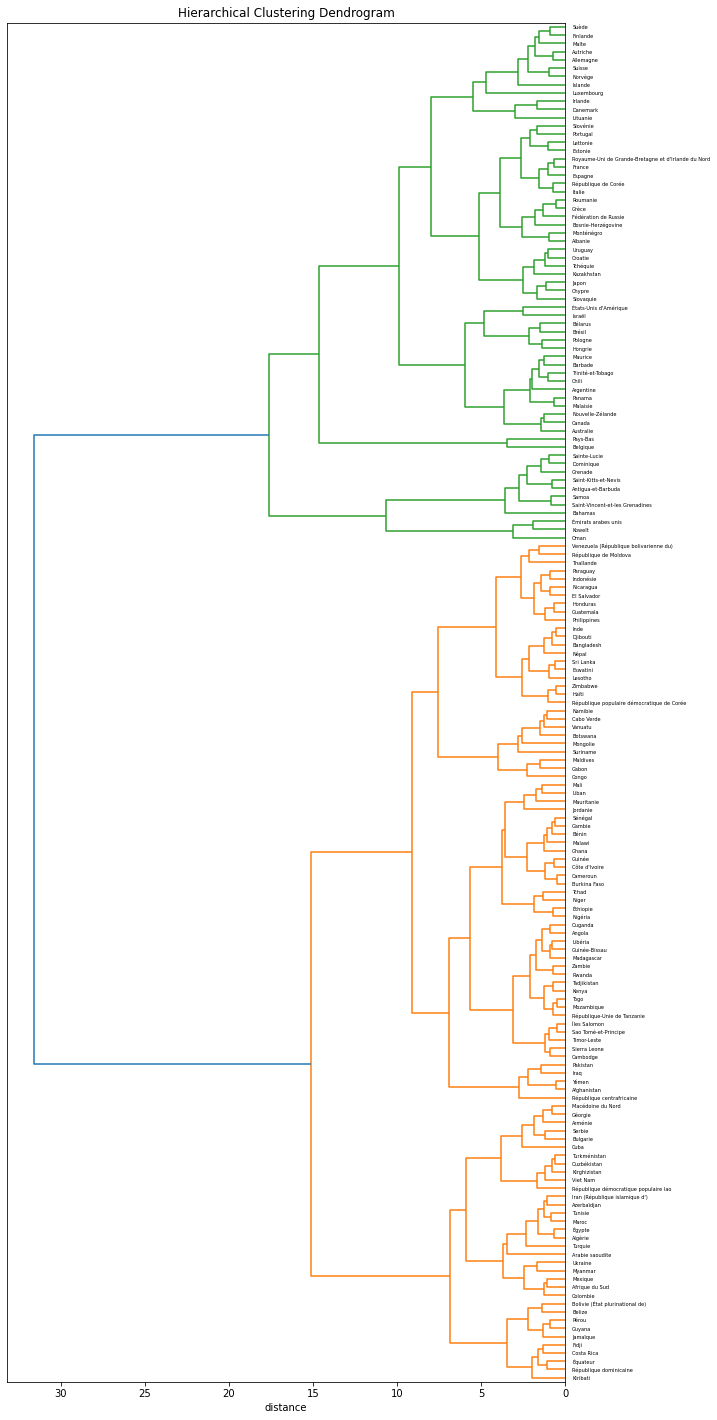

In [318]:
from functionsACP import *

# préparation des données pour le clustering
X = df.values
names = df.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

On constate 3 clusters 

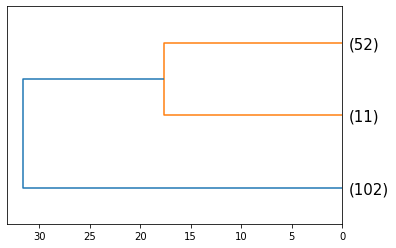

In [493]:
dendrogram(Z, labels = df.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation="left")
plt.show()

In [488]:
# Coupage du dendrogramme en 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({ "cluster": clusters, "pays": names })
print(courses)
cont = courses.pivot_table(index="pays", columns="cluster", aggfunc=len, fill_value=0)

     cluster                   pays
0          1            Afghanistan
1          1         Afrique du Sud
2          3                Albanie
3          1                Algérie
4          3              Allemagne
..       ...                    ...
160        2    Émirats arabes unis
161        1               Équateur
162        3  États-Unis d'Amérique
163        1               Éthiopie
164        1           Îles Salomon

[165 rows x 2 columns]


In [358]:
cont

cluster,1,2,3
pays,,,
Afghanistan,1,0,0
Afrique du Sud,1,0,0
Albanie,0,0,1
Algérie,1,0,0
Allemagne,0,0,1
...,...,...,...
Émirats arabes unis,0,1,0
Équateur,1,0,0
États-Unis d'Amérique,0,0,1


Ajout de la colonne cluster

In [489]:
df["cluster"] = courses["cluster"].values 

<ipython-input-489-0ffb2a8f72e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = courses["cluster"].values


Tableau regroupant les variables en clusters par leurs medianes

In [496]:
df.groupby(by="cluster").median()

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
cluster,,,,,,,,,
1,0.000,1.825,3.62,18.245,66.645,31.665,2643.0,6093.45,-0.40
2,0.000,62.870,1.50,8.930,85.040,60.170,2924.0,19840.30,0.89
3,3.265,7.450,27.09,4.115,102.840,57.985,3320.5,37278.30,0.62


On remarque à première vue que le :
 - **cluster 1** regroupe des pays pauvres avec une faible stabilité politique  et une forte évolution de la population (18% en 10ans). La production de volaille n'est pas très importante et l'importation comme l'exportation est quasi inexistante. Cela n'est pas un cluster pour s'implanter dû à la pauvreté et l'insécurité.
 - **cluster 2** regroupe des pays assez riche et stable politiquement (3 fois plus riche que le cluster 1) avec une importation de poulets très importante ce qui suppose qu'ils ont les infrastructures nécessaires pour accueillir nos volailles. Leur production en volaille est inexistante tout comme leur exportation. L'évolution de la population atteint les 9 % et leur consommation en protéines animales est la plus forte des 3 clusters. Ce cluster sera intéressant à analyser de par tous ces facteurs.
 - **cluster 3** regroupe des pays riches (2 fois plus riche que le cluster 2) et stable politiquement (moins que le cluster 2) avec une forte production de volailles. L'importation comme l'exportation est quasi inexistante, ce qui implique que leur production suffit à leur besoin en viande de volaille. L'évolution de la population est 2 fois moins forte que le cluster 2 mais leur consommation en protéines animales est tout de même élevée. Ce cluster sera également intéressant à analyser de par sa grande richesse, sa stabilité politique et sa consommation en protéines animales.

Voyons les corrélations entre les variables :

<ipython-input-392-f94b2bcab8b6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


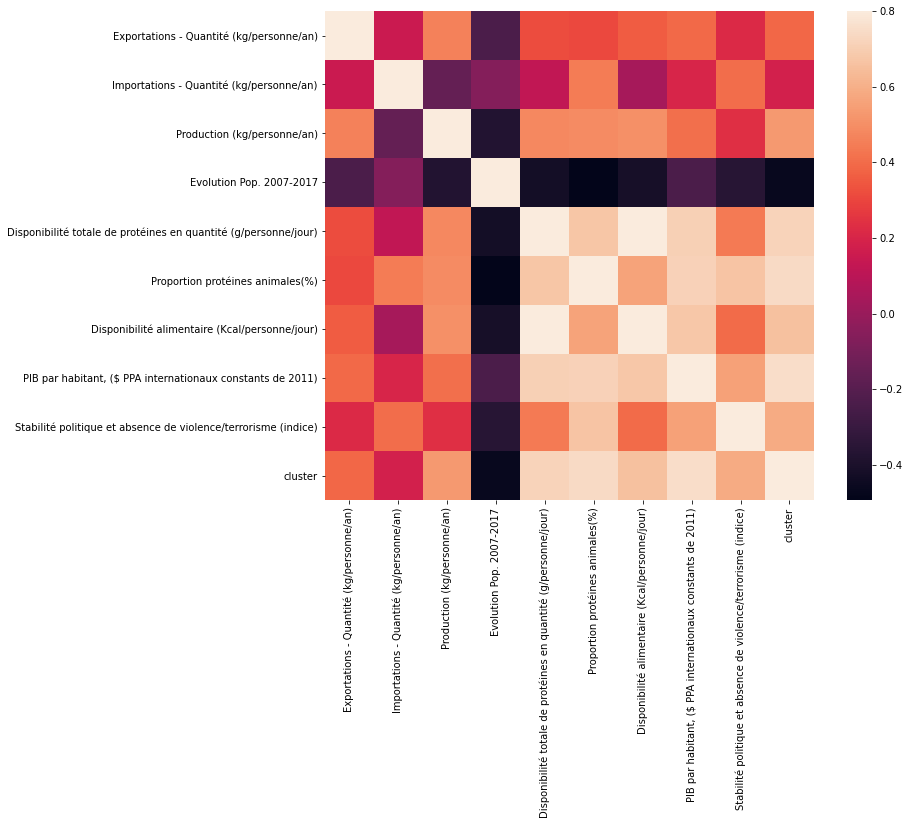

In [392]:
plt, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),vmax= .8, square=True)
plt.show()

#### On voit que les clusters sont très corrélés positivement avec ces 5 variables :
   - Disponibilité totale de protéines en quantité (g/personne/jour) 	
   - Proportion protéines animales(%) 	
   - Disponibilité alimentaire (Kcal/personne/jour) 	
   - PIB par habitant, ($ PPA internationaux constants de 2011) 	
   - Stabilité politique et absence de violence/terrorisme (indice)

Et négativement avec Evolution Pop. 2007-2017

Je créé un dataframe pour chaque cluster

In [393]:
pays_1 = courses["pays"][courses.cluster == 1].values
pays_2 = courses["pays"][courses.cluster == 2].values
pays_3 = courses["pays"][courses.cluster == 3].values


### **Cluster 1**

Regroupe des pays pauvres avec une faible stabilité politique  et une forte évolution de la population (18% en 10ans). La production de volaille n'est pas très importante et l'importation comme l'exportation est quasi inexistante. Cela n'est pas un cluster pour s'implanter dû à la pauvreté et l'insécurité.

In [394]:
df.loc[pays_1]

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster
Zone,,,,,,,,,,
Afghanistan,0.00,0.80,0.77,33.93,54.09,20.60,1997.0,2058.4,-2.80,1
Afrique du Sud,1.11,9.02,29.24,16.06,83.36,42.33,2987.0,12701.3,-0.28,1
Algérie,0.00,0.05,6.64,21.14,92.85,28.77,3345.0,11737.4,-0.92,1
Angola,0.00,9.29,1.41,42.63,54.09,30.15,2266.0,7310.9,-0.33,1
Arabie saoudite,0.30,21.81,18.61,31.43,87.51,39.10,3194.0,47306.2,-0.58,1
...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,0.00,0.42,4.85,16.16,51.20,21.91,2167.0,3274.6,-0.71,1
Égypte,0.01,1.14,11.59,23.28,96.27,26.50,3315.0,11014.5,-1.42,1
Équateur,0.00,0.00,20.26,17.41,65.77,46.89,2585.0,11617.9,-0.07,1


### **Cluster2**

Regroupe des pays assez riche et stable politiquement (3 fois plus riche que le cluster 1) avec une importation de poulets très importante ce qui suppose qu'ils ont les infrastructures nécessaires pour accueillir nos volailles. Leur production en volaille est inexistante tout comme leur exportation. L'évolution de la population atteint en moyenne les 9 % et leur consommation en protéines animales est la plus forte des 3 clusters. Ce cluster sera intéressant à analyser de par tous ces facteurs. De plus, ces pays sont situés dans le Moyen-Orient et dans les Caraïbes qui sont connus pour leur cuisine à base de volaille.

In [395]:
df.loc[pays_2]

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster
Zone,,,,,,,,,,
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2
Dominique,0.00,55.98,0.00,0.94,78.96,60.17,2945.0,11304.0,1.20,2
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2
Koweït,0.99,33.78,13.81,61.98,99.69,48.46,3445.0,50855.6,-0.05,2
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2
Saint-Vincent-et-les Grenadines,0.00,81.95,0.00,1.21,89.17,55.55,2962.0,12245.1,0.89,2
Sainte-Lucie,0.00,55.26,5.53,7.94,86.26,60.43,2658.0,14945.7,0.99,2


### **Cluster3**

Regroupe des pays riches (2 fois plus riche que le cluster 2) et stable politiquement (moins que le cluster 2) avec une forte production de volailles. L'importation comme l'exportation est quasi inexistante, ce qui implique que leur production suffit à leur besoin en viande de volaille. L'évolution de la population est 2 fois moins forte que le cluster 2 mais leur consommation en protéines animales est tout de même élevée. De plus, ce sont des pays d'Europe (donc proche géographiquement, ce qui peut être intéressant pour le commerce) et d'Amérique du Sud .  Ce cluster sera également intéressant à analyser de par sa grande richesse, sa stabilité politique , leur consommation en protéines animales et de par leur proximité géographique.

In [396]:
df.loc[pays_3]

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster
Zone,,,,,,,,,,
Albanie,0.00,13.18,4.51,-4.94,119.50,53.62,3400.0,12771.0,0.38,3
Allemagne,7.82,10.19,18.32,1.70,104.07,60.32,3559.0,52952.9,0.59,3
Argentine,4.71,0.18,49.18,10.72,102.66,65.91,3239.0,23597.1,0.17,3
Australie,1.71,0.65,51.62,17.54,108.01,65.28,3307.0,48482.6,0.89,3
Autriche,8.84,12.47,16.78,6.09,108.11,59.15,3694.0,54170.0,1.05,3
Barbade,0.00,6.99,52.41,2.70,88.74,56.11,2896.0,15789.0,0.97,3
Belgique,57.44,29.60,40.54,6.75,101.35,57.88,3770.0,50442.3,0.43,3
Bosnie-Herzégovine,2.39,2.98,18.20,-10.93,94.58,38.30,3266.0,13753.8,-0.35,3
Brésil,20.32,0.01,68.33,9.31,90.87,58.47,3250.0,14524.6,-0.42,3


## **2- Utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering + analyser les centroïdes des classes**

Méthode du Coude pour déterminer le nombre idéal de cluster.

In [340]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.values)
    distortions.append(kmeanModel.inertia_)

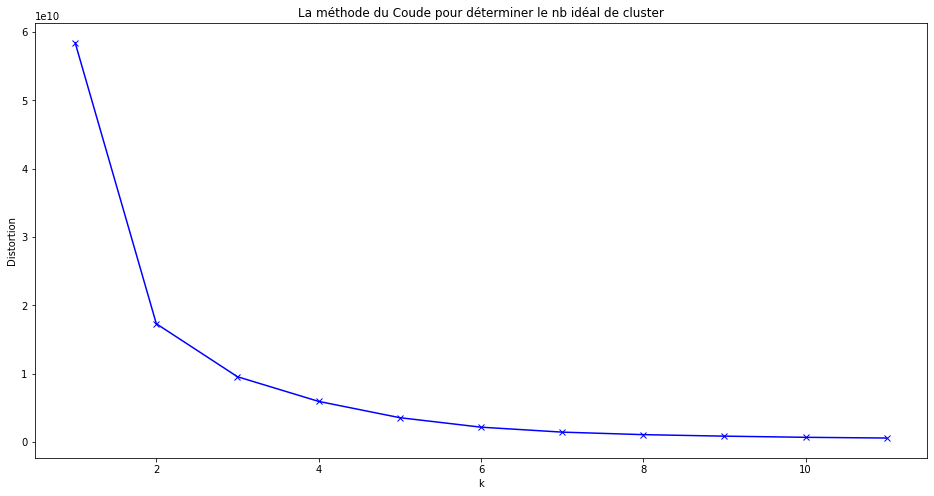

In [341]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('La méthode du Coude pour déterminer le nb idéal de cluster')
plt.show()

On constate que le nombre de cluster idéal est 3. 

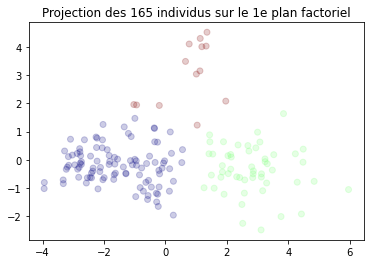

In [491]:


# Nombre de clusters souhaités
n_clust = 3

# préparation des données pour le clustering
X = df.values

# Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(float), cmap = 'jet', alpha=.2)

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

Les points bleus correspondent au cluster 1, les verts au cluster 3 et les rouges au cluster 2

**Analyse des centres de classes**

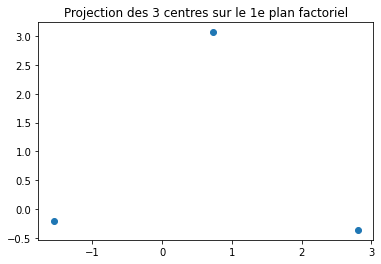

In [383]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

### Comparaison des résultats entre les 2 méthodes de clustering

In [499]:
df["clusters_Kmeans"] = clusters +1

<ipython-input-499-03dad1739828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters_Kmeans"] = clusters +1


Voici le cluster 1 représenté grâce à la méthode des kmeans (qui correspond au cluster 1 de la classification ascendante hiérarchique)

In [514]:
print(df[ (df["clusters_Kmeans"] == 1)].shape)
df[ (df["clusters_Kmeans"] == 1)].head()

(100, 11)


,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,clusters_Kmeans
Zone,,,,,,,,,,,
Afghanistan,0.00,0.80,0.77,33.93,54.09,20.60,1997.0,2058.4,-2.80,1,1
Afrique du Sud,1.11,9.02,29.24,16.06,83.36,42.33,2987.0,12701.3,-0.28,1,1
Algérie,0.00,0.05,6.64,21.14,92.85,28.77,3345.0,11737.4,-0.92,1,1
Angola,0.00,9.29,1.41,42.63,54.09,30.15,2266.0,7310.9,-0.33,1,1
Arabie saoudite,0.30,21.81,18.61,31.43,87.51,39.10,3194.0,47306.2,-0.58,1,1


On constate qu'il manque 2 pays mais les critères de clustering sont bien les mêmes que la classification ascendante hiérarchique

Voici le cluster 2 représenté grâce à la méthode des kmeans (qui correspond au cluster 3 de la classification ascendante hiérarchique)

In [516]:
print(df[ (df["clusters_Kmeans"] == 2)].shape)
df[(df["clusters_Kmeans"] == 2)].head()

(52, 11)


,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,clusters_Kmeans
Zone,,,,,,,,,,,
Albanie,0.00,13.18,4.51,-4.94,119.50,53.62,3400.0,12771.0,0.38,3,2
Allemagne,7.82,10.19,18.32,1.70,104.07,60.32,3559.0,52952.9,0.59,3,2
Argentine,4.71,0.18,49.18,10.72,102.66,65.91,3239.0,23597.1,0.17,3,2
Australie,1.71,0.65,51.62,17.54,108.01,65.28,3307.0,48482.6,0.89,3,2
Autriche,8.84,12.47,16.78,6.09,108.11,59.15,3694.0,54170.0,1.05,3,2


Le cluster 3 de la  classification ascendante hiérarchique et le cluster 2 des Kmeans sont identiques.

Voici le cluster 3 représenté grâce à la méthode des kmeans (qui correspond au cluster 2 de la classification ascendante hiérarchique)

In [518]:
print(df[ (df["clusters_Kmeans"] == 3)].shape)
df[(df["clusters_Kmeans"] == 3)]

(13, 11)


,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,clusters_Kmeans
Zone,,,,,,,,,,,
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2,3
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2,3
Dominique,0.00,55.98,0.00,0.94,78.96,60.17,2945.0,11304.0,1.20,2,3
Gabon,0.00,36.81,1.94,40.22,79.31,49.01,2640.0,15006.8,-0.10,1,3
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2,3
Koweït,0.99,33.78,13.81,61.98,99.69,48.46,3445.0,50855.6,-0.05,2,3
Maldives,0.00,24.17,0.00,48.10,81.63,59.95,2253.0,18058.6,0.23,1,3
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2,3
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2,3


Enfin, avec les 2 méthodes de clustering nous obtenons les mêmes résultats excepté pour la méthode des Kmeans : 

2 pays du cluster 1 (de la classification ascendante hierarchique) se sont glissés dans le cluster 2 (de la classification ascendante hierarchique).

Ces pays sont : 
   - les Maldives
   - le Gabon

In [521]:
df[(df["clusters_Kmeans"] == 3) & (df["cluster"] == 1)]

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,clusters_Kmeans
Zone,,,,,,,,,,,
Gabon,0.0,36.81,1.94,40.22,79.31,49.01,2640.0,15006.8,-0.10,1,3
Maldives,0.0,24.17,0.00,48.10,81.63,59.95,2253.0,18058.6,0.23,1,3


Ces pays sont assez riche mais faiblement stable politiquement avec une importation de poulets très importante ce qui suppose qu'ils ont les infrastructures nécessaires pour accueillir nos volailles. Leur production en volaille est inexistante tout comme leur exportation. Très forte évolution de la population et leur consommation en protéines animales.

In [522]:
df[(df["clusters_Kmeans"] == 3) & (df["cluster"] == 1)].merge(df_pop2017,on="Zone")

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,clusters_Kmeans,Population 2017
Zone,,,,,,,,,,,,
Gabon,0.0,36.81,1.94,40.22,79.31,49.01,2640.0,15006.8,-0.10,1,3,2064823.0
Maldives,0.0,24.17,0.00,48.10,81.63,59.95,2253.0,18058.6,0.23,1,3,496402.0


Ces critères de clustering correspondent aux mêmes que celui du cluster 2 de la classification ascendante hiérarchique, cependant ce qui diffère est la stabilité politique qui est bien plus faible.

Néanmoins les Maldives serait un bon candidat pour s'implanter si sa population était plus élevée.

Je choisis donc la méthode de la classification ascendante hiérarchique et ses clusters pour effectuer le reste de l'analyse.

## **3- Réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...**

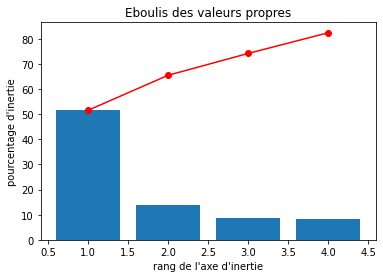

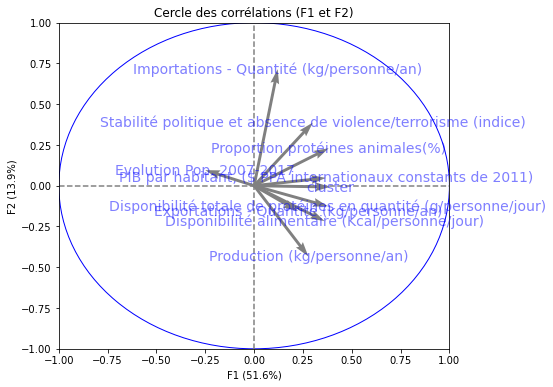

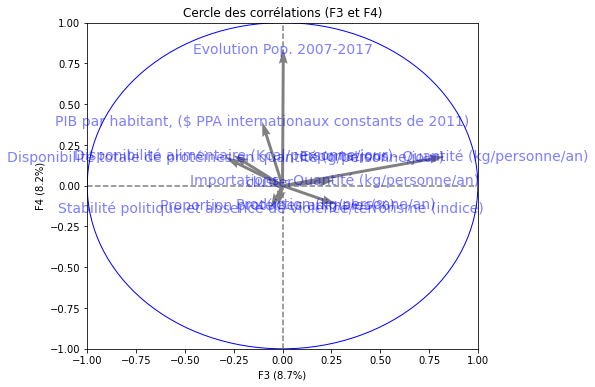

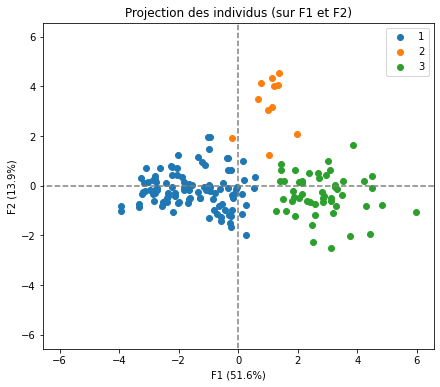

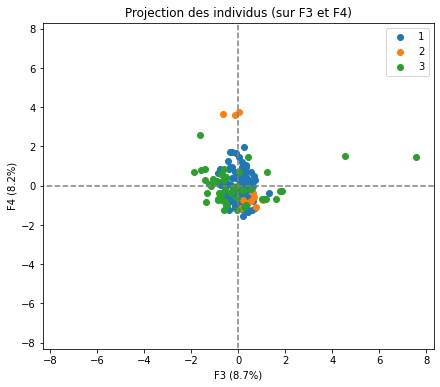

In [384]:
from sklearn import decomposition
from sklearn import preprocessing
from functionsACP import *

# choix du nombre de composantes à calculer
n_comp = 4

data= df

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index# ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)] ,illustrative_var=df["cluster"]) #, labels = np.array(names))

plt.show()

On constate que les 3 premiers axes représentent environ 75% d'inertie.

#### **F1 semble être le meilleur axe pour s'implanter car il représente 51.6% de l'inertie et regroupe 7 variables sur 9 :**
 - Exportations - Quantité (kg/personne/an) 	
 - Importations - Quantité (kg/personne/an) 	
 - Disponibilité totale de protéines en quantité (g/personne/jour) 	
 - Proportion protéines animales(%) 	
 - Disponibilité alimentaire (Kcal/personne/jour) 	
 - PIB par habitant, ( PPA internationaux constants de 2011) 	
 - Stabilité politique et absence de violence/terrorisme (indice)
 
Par contre la variable **Evolution Pop. 2007-2017** est à l'opposé des autres.

Les clusters 2 et 3 sont les meilleurs candidats pour s'implanter selon L'ACP (ils se situent vers les variables les plus représentatives). Ce sont des pays qui sont pour la plupart positionnés positivement sur l'axe des abscisses (F1 la variable la plus forte) et qui sont aussi positive sur l'axe des ordonnées (F2).En effet, ces groupes de pays ont déja un fort potentiel d'importation donc ont déjà toutes les infrastructures pour pouvoir accueillir nos produits de volaille. De plus, leurs PIB par habitant sont les plus élevés donc notre clientèle sera en mesure d'acheter nos volailles.  

## **TEST STATISTIQUES POUR CHOISIR QUEL CLUSTER EST LE PLUS PERTINENT**

Effectuons un Test de Kolmogorov Smirnov pour vérifier l'adéquation des variables à une loi normale

In [449]:
from scipy.stats import kstest
normal=[]
pas_normal = []
alpha = 0.05
for cln in df.columns:
    stat_test,p_value=kstest(*[group[cln].values for name , group in df.groupby('cluster') ], 'norm')
    print(f"# la statistique de test de {cln} est : {stat_test}")
    print(f"la p_value du test de {cln} est {p_value} \n")

    if p_value > alpha:
     print(f"L'échantillon {cln} semble suivre une loi normale (On ne rejette pas H0)\n")
     normal.append(cln)
    else:
     print(f"L'échantillon {cln} semble ne pas suivre une loi normale (On rejette H0)\n")
     pas_normal.append(cln)
print(f"\nVoici les variables suivant une loi normale : {normal}\n")
print(f"\nVoici les variables ne suivant pas une loi normale : {pas_normal}\n")


# la statistique de test de Exportations - Quantité (kg/personne/an) est : 0.18449197860962566
la p_value du test de Exportations - Quantité (kg/personne/an) est 0.8242313638225247 

L'échantillon Exportations - Quantité (kg/personne/an) semble suivre une loi normale (On ne rejette pas H0)

# la statistique de test de Importations - Quantité (kg/personne/an) est : 0.9705882352941176
la p_value du test de Importations - Quantité (kg/personne/an) est 1.252220549474714e-12 

L'échantillon Importations - Quantité (kg/personne/an) semble ne pas suivre une loi normale (On rejette H0)

# la statistique de test de Production (kg/personne/an) est : 0.39572192513368987
la p_value du test de Production (kg/personne/an) est 0.06489654286588376 

L'échantillon Production (kg/personne/an) semble suivre une loi normale (On ne rejette pas H0)

# la statistique de test de Evolution Pop. 2007-2017 est : 0.4037433155080214
la p_value du test de Evolution Pop. 2007-2017 est 0.05657491600831166 

L'échanti

#### Effectuons maintenant un test de comparaison des variables suivant une loi normale entre les clusters 2 et 3 (qui sont les plus pertinents): 

In [468]:
var_pas_egale=[]
for cln in normal:
    stat_var,p_value = st.bartlett(df[df["cluster"]==2][cln],df[df["cluster"]==3][cln])
    print("Test de comparaison des variances :\n")
    print("la statistique de test est :",stat_var)
    print("la p_value du test est ", p_value)
    alpha = 0.05
    if p_value > alpha:
     print(f"L'échantillon {cln} semble avoir une égalité des variances (On ne rejette pas H0)\n")
    else:
     print(f"L'échantillon {cln} semble ne pas avoir une égalité des variances (On rejette H0)\n")
     var_pas_egale.append(cln)

Test de comparaison des variances :

la statistique de test est : 20.413284564125018
la p_value du test est  6.2395158579776424e-06
L'échantillon Exportations - Quantité (kg/personne/an) semble ne pas avoir une égalité des variances (On rejette H0)

Test de comparaison des variances :

la statistique de test est : 12.907239900037096
la p_value du test est  0.00032731360035269093
L'échantillon Production (kg/personne/an) semble ne pas avoir une égalité des variances (On rejette H0)

Test de comparaison des variances :

la statistique de test est : 35.945056745910904
la p_value du test est  2.029606338965511e-09
L'échantillon Evolution Pop. 2007-2017 semble ne pas avoir une égalité des variances (On rejette H0)

Test de comparaison des variances :

la statistique de test est : 4.904181756313995
la p_value du test est  0.026791741983245958
L'échantillon Disponibilité alimentaire (Kcal/personne/jour) semble ne pas avoir une égalité des variances (On rejette H0)



In [470]:
var_mean_pas_egale=[]
for cln in var_pas_egale:
    stat_var,p_value = st.ttest_ind(df[df["cluster"]==2][cln],df[df["cluster"]==3][cln])
    print("Test de comparaison des moyennes :\n")
    print("la statistique de test est :",stat_var)
    print("la p_value du test est ", p_value)
    alpha = 0.05
    if p_value > alpha:
     print(f"L'échantillon {cln} semble avoir une égalité des moyennes (On ne rejette pas H0)\n")
    else:
     print(f"L'échantillon {cln} semble ne pas avoir une égalité des moyennes (On rejette H0)\n")
     var_mean_pas_egale.append(cln)
print(f"\nVoici les variables qui différencient significativement les clusters 2 et 3 : {var_mean_pas_egale}")

Test de comparaison des moyennes :

la statistique de test est : -1.5732514610077792
la p_value du test est  0.12083344751433456
L'échantillon Exportations - Quantité (kg/personne/an) semble avoir une égalité des moyennes (On ne rejette pas H0)

Test de comparaison des moyennes :

la statistique de test est : -4.6190851292716575
la p_value du test est  2.0413012847360714e-05
L'échantillon Production (kg/personne/an) semble ne pas avoir une égalité des moyennes (On rejette H0)

Test de comparaison des moyennes :

la statistique de test est : 4.077224691923974
la p_value du test est  0.00013409066495722336
L'échantillon Evolution Pop. 2007-2017 semble ne pas avoir une égalité des moyennes (On rejette H0)

Test de comparaison des moyennes :

la statistique de test est : -5.287139985625371
la p_value du test est  1.769860000513572e-06
L'échantillon Disponibilité alimentaire (Kcal/personne/jour) semble ne pas avoir une égalité des moyennes (On rejette H0)


Voici les variables qui différenc

Concentrons nous sur le cluster 2 qui est le plus pertinent des 3 car l'évolution de sa population est 2 fois plus forte que le cluster 3 , sa production en volaille est inexistante (donc pas de concurrences) et le cluster 2 détient les infrastructures nécessaires pour accueillir nos volailles. 

Rétrécissons cette liste de pays selon quelques critères. 

Commençons par le PIB par habitant :

In [432]:
df_cluster2 = df.loc[pays_2].sort_values(by="PIB par habitant, ($ PPA internationaux constants de 2011)",ascending=False)
df_cluster2

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster
Zone,,,,,,,,,,
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62,2
Koweït,0.99,33.78,13.81,61.98,99.69,48.46,3445.0,50855.6,-0.05,2
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2
Sainte-Lucie,0.00,55.26,5.53,7.94,86.26,60.43,2658.0,14945.7,0.99,2
Saint-Vincent-et-les Grenadines,0.00,81.95,0.00,1.21,89.17,55.55,2962.0,12245.1,0.89,2


Ajoutons la variable population afin de sélectionner cette liste de pays. Une forte population est plus intéressante pour le commerce.

In [433]:
df_cluster2 = df_cluster2.merge(df_pop2017,on="Zone")

In [434]:
df_cluster2 = df_cluster2[df_cluster2["PIB par habitant, ($ PPA internationaux constants de 2011)"] >15000]

Nous avons sélectionné les pays avec un fort PIB afin de s'assurer qu'ils soient en mesure d'acheter nos produits.

In [435]:
df_cluster2.sort_values(by="Stabilité politique et absence de violence/terrorisme (indice)",ascending=False)

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,Population 2017
Zone,,,,,,,,,,,
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2,110874.0
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2,381755.0
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2,4665928.0
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2,95426.0
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2,52045.0
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62,2,9487203.0
Koweït,0.99,33.78,13.81,61.98,99.69,48.46,3445.0,50855.6,-0.05,2,4056099.0


Nous avons éliminé les pays avec une faible stabilité politique.

In [436]:
df_cluster2 = df_cluster2[df_cluster2["Stabilité politique et absence de violence/terrorisme (indice)"] >0]
df_cluster2

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,Population 2017
Zone,,,,,,,,,,,
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62,2,9487203.0
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2,381755.0
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2,4665928.0
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2,52045.0
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2,95426.0
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2,110874.0


In [437]:
df_cluster2.sort_values(by="Population 2017",ascending=False)

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,Population 2017
Zone,,,,,,,,,,,
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62,2,9487203.0
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2,4665928.0
Bahamas,0.00,62.87,15.72,13.15,61.37,85.51,2043.0,36298.4,0.99,2,381755.0
Grenade,0.00,63.13,9.02,5.40,70.57,58.52,2404.0,16217.5,1.01,2,110874.0
Antigua-et-Barbuda,0.00,73.36,0.00,13.57,81.15,63.72,2429.0,19840.3,0.75,2,95426.0
Saint-Kitts-et-Nevis,0.00,76.86,0.00,8.93,76.86,72.00,2517.0,25360.1,0.65,2,52045.0


Ici, nous avons choisi les pays les plus peuplés de cette liste.

In [494]:
df_cluster2 = df_cluster2[df_cluster2["Population 2017"] > 400000]
df_cluster2

,Exportations - Quantité (kg/personne/an),Importations - Quantité (kg/personne/an),Production (kg/personne/an),Evolution Pop. 2007-2017,Disponibilité totale de protéines en quantité (g/personne/jour),Proportion protéines animales(%),Disponibilité alimentaire (Kcal/personne/jour),"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice),cluster,Population 2017
Zone,,,,,,,,,,,
Émirats arabes unis,9.91,45.64,5.06,53.79,107.26,48.05,3370.0,67183.6,0.62,2,9487203.0
Oman,3.43,27.00,1.50,75.60,85.04,49.49,2924.0,29077.4,0.75,2,4665928.0


Voici les pays où vous pouvez vous implanter :
 - Ce sont des pays du  Moyen Orient avec une politique stable et une population en grande expansion. 
 - La proportion en protéines est équilibrée entre protéines animales et végétales ce qui laisse la place au commerce de viandes.
 - Le PIB est conséquent ce qui veut dire qu'ils sont en mesure d'importer de grandes quantités de volailles. 
 - Leur production en volaille est quasi nulle et les importations sont peu importantes donc peu de concurrences mais avec tout de même les infrastructures pour accueillir nos produits.